# Credit Card Fraud detection

## Introduction
Fraud detection is one of the applications of machine learning. 
Credit card companies must identify fraudulent transactions to reduce financial losses.
Since fraud cases are very less compared to legitimate transactions, this is a create a imbalanced classification problem.

In this project, we will:
- Use the dataset of Credit Card Fraud Detection from Kaggle.
- Preprocess the dataset.
- Train a Logistic Regression model with class weights to handle imbalance.
- Evaluate the model.
- Analyze feature importance to understand what contributes most to fraud detection.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")


In [30]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Loading the Dataset

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
data = pd.read_csv(url)
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Analysis

Class
0    284315
1       492
Name: count, dtype: int64


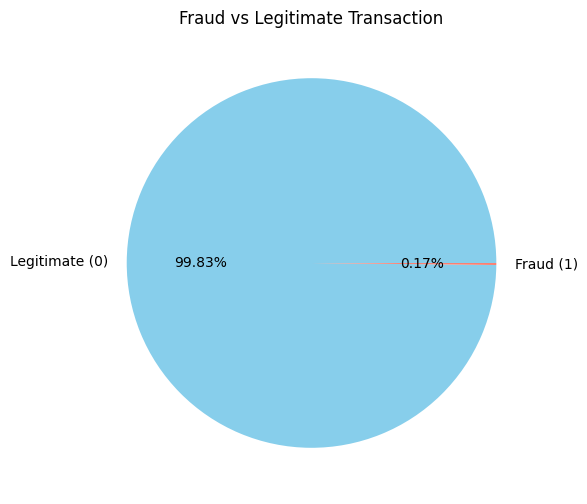

In [5]:
class_count = data["Class"].value_counts()
print(class_count)

plt.figure(figsize=(6,6))
plt.pie(class_count, labels=["Legitimate (0)", "Fraud (1)"], autopct = '%1.2f%%', colors = ['skyblue', 'salmon'])
plt.title("Fraud vs Legitimate Transaction")
plt.show()

## Correlation Analysis

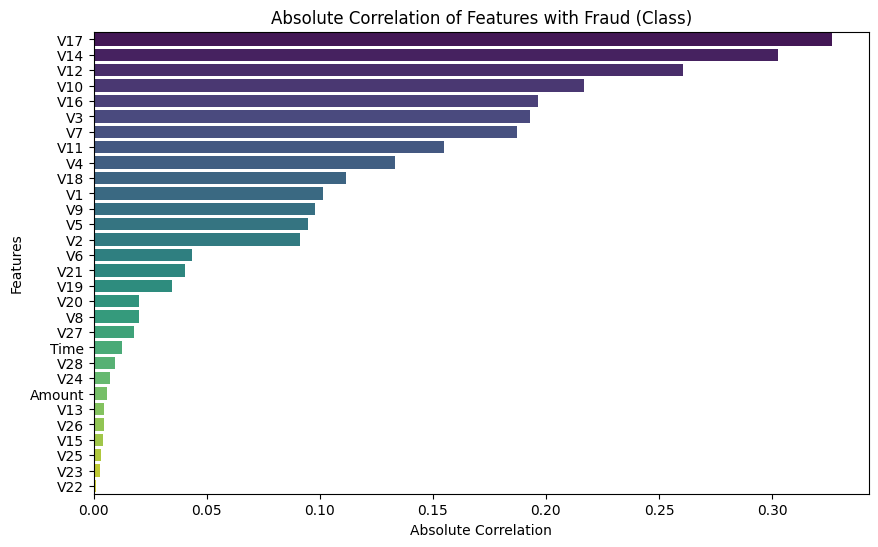

Top 14 features most correlated with Fraud:
 ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'V1', 'V9', 'V5', 'V2']


In [22]:
correlation_values = data.corr()['Class'].drop('Class')
abs_correlation = correlation_values.abs().sort_values(ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=abs_correlation.values, y=abs_correlation.index, palette="viridis")
plt.title("Absolute Correlation of Features with Fraud (Class)")
plt.xlabel("Absolute Correlation")
plt.ylabel("Features")
plt.show()


top_features = abs_correlation.head(14).index.tolist()
print("Top 14 features most correlated with Fraud:\n", top_features)

## Preprocessing

In [23]:
X = data[top_features].values
y = data['Class'].values
X = StandardScaler().fit_transform(X)
X = normalize(X, norm='l1')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print(X_train.shape[0])
print(X_test.shape[0])

199364
85443


## Train the model

In [28]:
w_train = compute_sample_weight("balanced", y_train)
log_reg = LogisticRegression(max_iter = 1000, random_state = 42)
log_reg.fit(X_train, y_train, sample_weight = w_train)
print("Model trainig completed!!")

Model trainig completed!!


## Evaluation

Logistic regression ROC_AUC score: 0.971064
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.88      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443



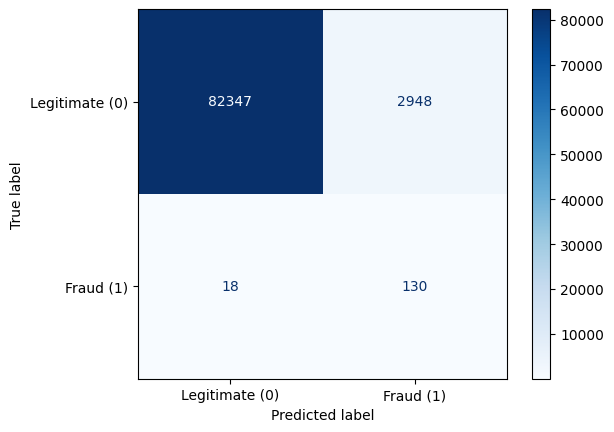

In [27]:
y_pred_1 = log_reg.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_1)
print("Logistic regression ROC_AUC score: {:4f}".format(roc_auc))

y_pred = log_reg.predict(X_test)
print("Classification report: \n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels = [0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ["Legitimate (0)", "Fraud (1)"])
disp.plot(cmap="Blues")
plt.show()

## Random Forest

## Results & Observations

- ROC-AUC Score = 0.97 which means strong ability to distinguish fraud vs legitimate.
- **Classification Report**:  
  - High recall for the fraud class is important (catching fraud cases).  

- **Feature Importance**:  
  - Some features (V17, V14, V12, etc.) have stronger influence on predicting fraud. 


## Conclusion

- Logistic Regression is a **simple yet effective model** for credit card fraud detection.  
- By using **scaling, normalization, and class weights**, we handled the dataset’s imbalance.  
